In [45]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from access import password, salquery
# in addition to storing password in .py, stored query to use due to length

In [49]:
# import sql data
# remove password before uploading
engine = create_engine('postgresql://postgres:' + password + '@localhost:5432/EmployeeSQL')
connection = engine.connect()
connection

In [50]:
# read query in data frame
salaries = pd.read_sql_query(salquery,connection)
salaries

title_id             title  salary
0         e0002          Engineer   48973
1         e0003   Senior Engineer   40000
2         e0004  Technique Leader   43548
3         s0001             Staff   63377
4         e0003   Senior Engineer   40000
...         ...               ...     ...
300019    s0001             Staff   40000
300020    e0004  Technique Leader   40000
300021    e0003   Senior Engineer   59703
300022    e0003   Senior Engineer   48038
300023    e0003   Senior Engineer   40000

[300024 rows x 3 columns]

<AxesSubplot:title={'center':'Frequency of Salaries for Employees'}, xlabel='Salary', ylabel='Frequency'>

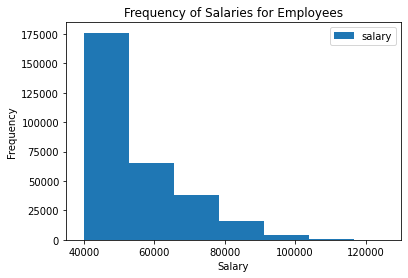

In [82]:
# Create a histogram to visualize the most common salary ranges for employees
salaries.describe() # view information on data set
RangePlot = salaries.plot(kind = 'hist', bins = 7)
RangePlot.set_xlim(35000, 130000)
RangePlot.set_xlabel('Salary')
RangePlot.set_title('Frequency of Salaries for Employees')
RangePlot

    # If we wanted to manually bin and use a bar graph instead of built-in histogram:
#bins = (40000,50000,60000, 70000,80000,90000,100000,130000)
#labels = ('$40,000 - 49,999', '$50,000 - 59,999', '$60,000 - 69,999', '$70,000 - 79,999', '$80,000 - 89,999', '$90,000 - 99,999', '$100,000+')
#salaries['sranges'] = pd.cut(salaries['salary'], bins = bins, labels = labels)
#rangecounts = salaries.groupby('sranges')['salary'].count()

Text(0.5, 1.0, 'Average Salary by Job Title')

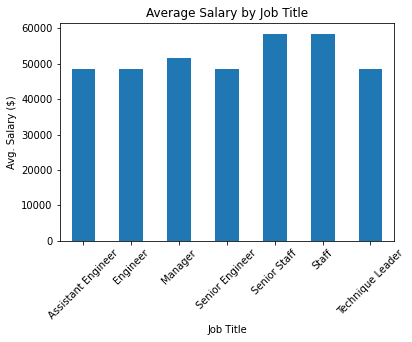

In [51]:
# Create a bar chart of average salary by title
AvgSal = salaries.groupby('title')['salary'].mean()
AvgSalBar = AvgSal.plot(kind="bar", rot = 45)
AvgSalBar.set_xlabel('Job Title')
AvgSalBar.set_ylabel('Avg. Salary ($)')
AvgSalBar.set_title('Average Salary by Job Title')

Evidence in hand, you march into your boss's office and present the visualization. With a sly grin, your boss thanks you for your work. On your way out of the office, you hear the words, "Search your ID number." You look down at your badge to see that your employee ID number is 499942.

In [84]:
badge = pd.read_sql_query('SELECT * FROM employees WHERE emp_no = 499942',connection)
badge

emp_no emp_title  birth_date first_name last_name sex   hire_date
0  499942     e0004  1963-01-10      April  Foolsday   F  1997-02-10